In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

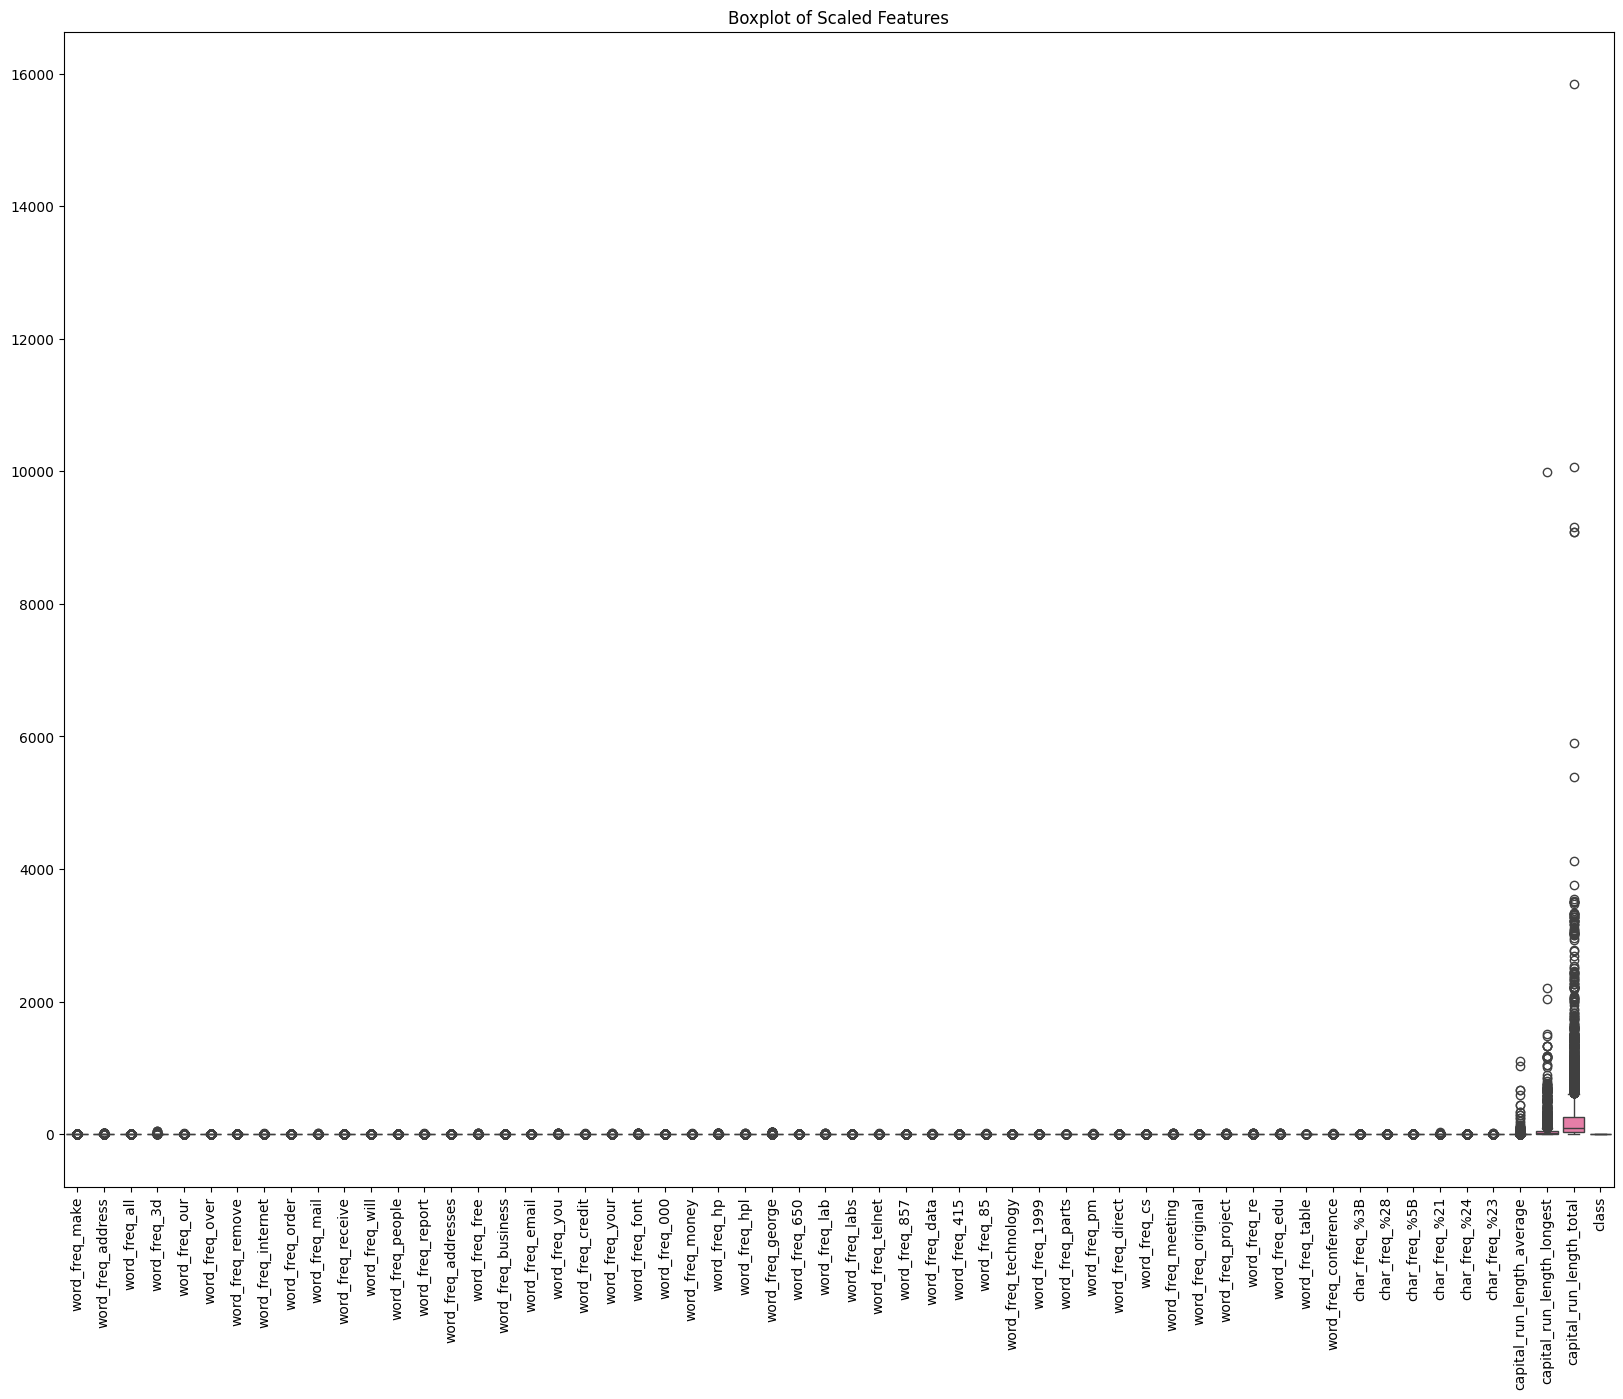


Number of outliers per column (IQR method):
word_freq_make                1053
word_freq_address              898
word_freq_all                  338
word_freq_3d                    47
word_freq_our                  501
word_freq_over                 999
word_freq_remove               807
word_freq_internet             824
word_freq_order                773
word_freq_mail                 852
word_freq_receive              709
word_freq_will                 270
word_freq_people               852
word_freq_report               357
word_freq_addresses            336
word_freq_free                 957
word_freq_business             963
word_freq_email               1038
word_freq_you                   75
word_freq_credit               424
word_freq_your                 229
word_freq_font                 117
word_freq_000                  679
word_freq_money                735
word_freq_hp                  1090
word_freq_hpl                  811
word_freq_george               780
word_freq_

In [ ]:


#importing libraries for classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing dataset
df = pd.read_csv('/content/drive/MyDrive/spambase_csv.csv')
df

#performing eda
missing_values = df.isna().sum()
print(missing_values)

#dealing with missing values
# Fill numerical columns with mean
df.fillna(df.mean(), inplace=True)


# Check for outliers visually using boxplots
plt.figure(figsize=(20, 15))
sns.boxplot(data=df)
plt.title('Boxplot of Scaled Features')
plt.xticks(rotation=90)
plt.show()

# Check for outliers programmatically using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df < lower_bound) | (df > upper_bound)).sum()
print("\nNumber of outliers per column (IQR method):")
print(outliers[outliers > 0])

#removing outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]



In [ ]:
#dropping target variable
y = df['class']
df = df.drop('class', axis=1)

In [ ]:
#using standard scaler on data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
#performing SVC for each type of kernel [linear,polynomial,RBF,Sigmoid]
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=42)

#performing grid search to find the best parameters for each kernel
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': ['scale','auto',1, 0.1, 0.01, 0.001], 'kernel': ['linear','poly','rbf','sigmoid']}

svm = SVC()
grid_search = GridSearchCV(svm, param_grid, refit=True, verbose=3)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.828 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.893 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.821 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.893 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.857 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.862 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.929 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.857 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.893 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.893 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.862 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf

In [ ]:
#checking best parameters for linear using grid search
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear']}

svml = SVC()
grid_searchl = GridSearchCV(svm, param_grid, refit=True, verbose=3)
grid_searchl.fit(X_train, y_train)

best_paramsl = grid_searchl.best_params_
best_scorel = grid_searchl.best_score_
print(f"Best Hyperparameters: {best_paramsl}")
print(f"Best Cross-Validation Accuracy: {best_scorel:.4f}")


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.828 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.893 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.821 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.893 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.857 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.862 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=0.857 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=0.821 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=0.893 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=0.857 total time=   0.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.828 total time=   0.0s
[CV 2/5] END ...............C=10, kernel=linear;,

In [ ]:
#performing SVM with linear kernel
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy_linear = accuracy_score(y_test, y_pred_linear)
precision_linear = precision_score(y_test, y_pred_linear)
recall_linear = recall_score(y_test, y_pred_linear)
f1_linear = f1_score(y_test, y_pred_linear)

print("Accuracy:", accuracy_linear)
print("Precision:", precision_linear)
print("Recall:", recall_linear)
print("F1-score:", f1_linear)

Accuracy: 0.9444444444444444
Precision: 1.0
Recall: 0.6666666666666666
F1-score: 0.8


In [ ]:
#checking best parameters for linear using grid search
param_grid = {'C': [0.1, 1, 10, 100],'gamma': ['scale','auto',1, 0.1, 0.01, 0.001], 'kernel': ['poly'],'degree': [1,2,3,4]}

svmp = SVC()
grid_searchp = GridSearchCV(svmp, param_grid, refit=True, verbose=3)
grid_searchp.fit(X_train, y_train)

best_paramsp = grid_searchp.best_params_
best_scorep = grid_searchp.best_score_
print(f"Best Hyperparameters: {best_paramsp}")
print(f"Best Cross-Validation Accuracy: {best_scorep:.4f}")


Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END C=0.1, degree=1, gamma=scale, kernel=poly;, score=0.862 total time=   0.0s
[CV 2/5] END C=0.1, degree=1, gamma=scale, kernel=poly;, score=0.893 total time=   0.0s
[CV 3/5] END C=0.1, degree=1, gamma=scale, kernel=poly;, score=0.893 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, gamma=scale, kernel=poly;, score=0.893 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=scale, kernel=poly;, score=0.893 total time=   0.0s
[CV 1/5] END C=0.1, degree=1, gamma=auto, kernel=poly;, score=0.862 total time=   0.0s
[CV 2/5] END C=0.1, degree=1, gamma=auto, kernel=poly;, score=0.893 total time=   0.0s
[CV 3/5] END C=0.1, degree=1, gamma=auto, kernel=poly;, score=0.893 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, gamma=auto, kernel=poly;, score=0.893 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=auto, kernel=poly;, score=0.893 total time=   0.0s
[CV 1/5] END C=0.1, degree=1, gamma=1, kernel=poly;, score=0.82

In [ ]:
#performing SVM polynomial with best hyperparameters
svm_polynomial = SVC(kernel='poly', C=0.1, degree=2, gamma=1)
svm_polynomial.fit(X_train, y_train)
y_pred_polynomial = svm_polynomial.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy_poly = accuracy_score(y_test, y_pred_polynomial)
precision_poly = precision_score(y_test, y_pred_polynomial)
recall_poly = recall_score(y_test, y_pred_polynomial)
f1_poly = f1_score(y_test, y_pred_polynomial)


print("Accuracy:", accuracy_poly)
print("Precision:", precision_poly)
print("Recall:", recall_poly)
print("F1-score:", f1_poly)

Accuracy: 0.9444444444444444
Precision: 1.0
Recall: 0.6666666666666666
F1-score: 0.8


In [ ]:
#checking best parameters for rbf using grid search
param_grid = {'C': [0.1, 1, 10, 100],'gamma': ['scale','auto',1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

svmr = SVC()
grid_searchr = GridSearchCV(svmr, param_grid, refit=True, verbose=3)
grid_searchr.fit(X_train, y_train)

best_paramsr = grid_searchr.best_params_
best_scorer = grid_searchr.best_score_
print(f"Best Hyperparameters: {best_paramsr}")
print(f"Best Cross-Validation Accuracy: {best_scorer:.4f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.862 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.893 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.893 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.893 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.893 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.862 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.893 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.893 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.893 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.893 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.862 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf

In [ ]:
#performing SVM with RBF kernel based on best parameters
svm_rbf = SVC(kernel='rbf', C=10, gamma=0.1)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_polynomial.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf)
recall_rbf = recall_score(y_test, y_pred_rbf)
f1_rbf = f1_score(y_test, y_pred_rbf)


print("Accuracy:", accuracy_rbf)
print("Precision:", precision_rbf)
print("Recall:", recall_rbf)
print("F1-score:", f1_rbf)

Accuracy: 0.9444444444444444
Precision: 1.0
Recall: 0.6666666666666666
F1-score: 0.8


In [ ]:
#checking best parameters for sigmoid kernel using grid search
param_grid = {'C': [0.1, 1, 10, 100],'gamma': ['scale','auto',1, 0.1, 0.01, 0.001], 'kernel': ['sigmoid']}

svmr = SVC()
grid_searchr = GridSearchCV(svmr, param_grid, refit=True, verbose=3)
grid_searchr.fit(X_train, y_train)

best_paramsr = grid_searchr.best_params_
best_scorer = grid_searchr.best_score_
print(f"Best Hyperparameters: {best_paramsr}")
print(f"Best Cross-Validation Accuracy: {best_scorer:.4f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.1, gamma=scale, kernel=sigmoid;, score=0.862 total time=   0.0s
[CV 2/5] END C=0.1, gamma=scale, kernel=sigmoid;, score=0.893 total time=   0.0s
[CV 3/5] END C=0.1, gamma=scale, kernel=sigmoid;, score=0.893 total time=   0.0s
[CV 4/5] END C=0.1, gamma=scale, kernel=sigmoid;, score=0.893 total time=   0.0s
[CV 5/5] END C=0.1, gamma=scale, kernel=sigmoid;, score=0.893 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=auto, kernel=sigmoid;, score=0.862 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=auto, kernel=sigmoid;, score=0.893 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=auto, kernel=sigmoid;, score=0.893 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=auto, kernel=sigmoid;, score=0.893 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=auto, kernel=sigmoid;, score=0.893 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.862 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

In [ ]:
#performing svm with sigmoid kernel based on best parameters and evaluating with metrics
svm_sigmoid = SVC(kernel='sigmoid', C=1, gamma=1)
svm_sigmoid.fit(X_train, y_train)
y_pred_sig = svm_sigmoid.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy_sig = accuracy_score(y_test, y_pred_sig)
precision_sig = precision_score(y_test, y_pred_sig)
recall_sig = recall_score(y_test, y_pred_sig)
f1_sig = f1_score(y_test, y_pred_sig)


print("Accuracy:", accuracy_sig)
print("Precision:", precision_sig)
print("Recall:", recall_sig)
print("F1-score:", f1_sig)

Accuracy: 0.8611111111111112
Precision: 1.0
Recall: 0.16666666666666666
F1-score: 0.2857142857142857


In [ ]:
#K-fold cross validation with SVM , linear kernel
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear', C=100)
scores = cross_val_score(svm_linear, df_scaled, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.86111111 0.88888889 0.88571429 0.91428571 0.8       ]
Mean accuracy: 0.8699999999999999
